<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hopfield

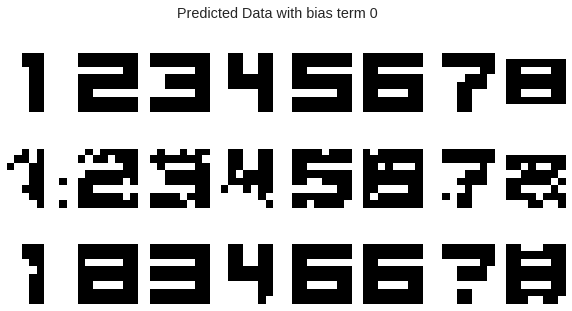

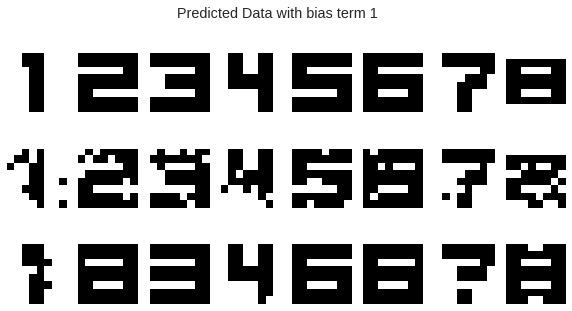

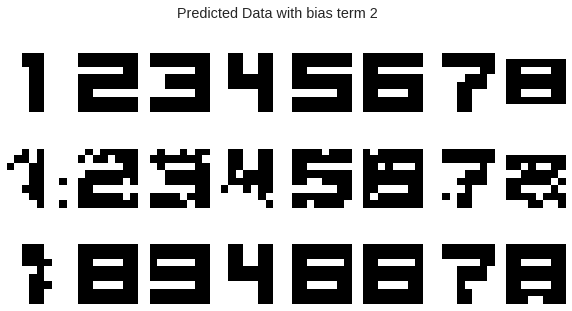

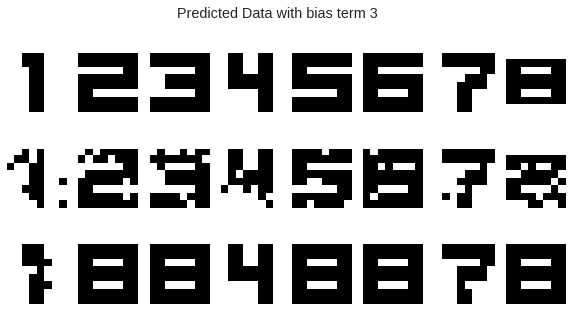

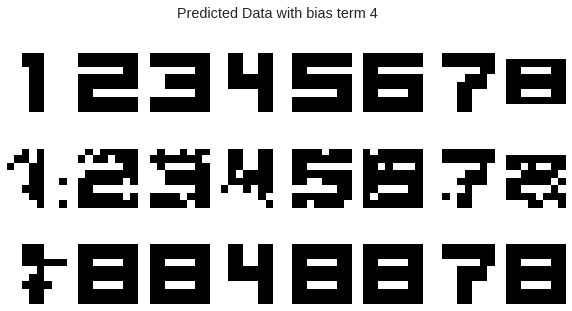

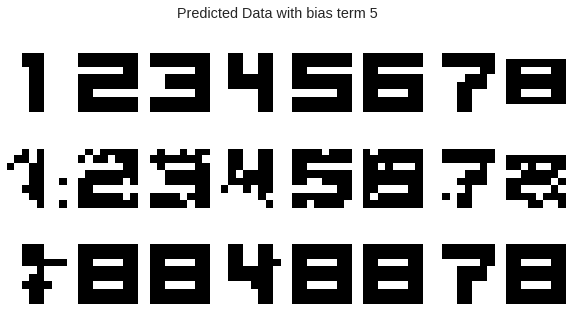

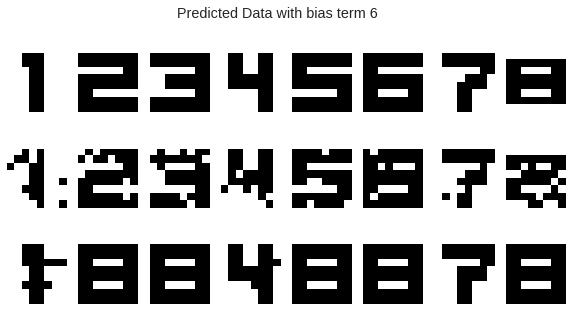

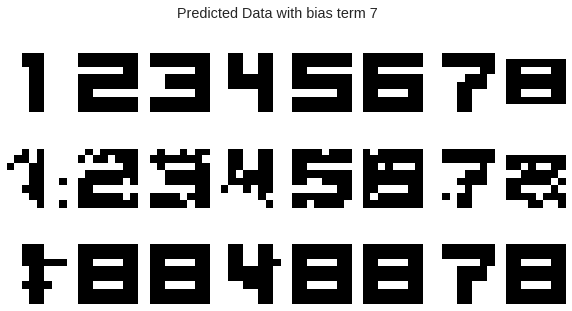

In [2]:
"""
This code reproduces a part of mnist data
as 80 png images which differ in the bias term.

One can make a gif animation by using convert command as follows:

convert -layers optimize -loop 0 -delay 10 *.png anim.gif

Also, one can embed them in the animated form  into a beamer slide
by using animate package and animategraphics function as follows:

\animategraphics[loop,controls,width=\linewidth]{12}{}{00}{79}
"""
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.animation import ArtistAnimation
# from sklearn.datasets import fetch_mldata

# import mnist


class HopfieldNet(object):
    """Fully-connected HopfieldNet

    This is a fully connected HopfieldNet with binary threshold units
    and recurrent interconnections.

    It is generated by applying outer product costruction algorithm to the train data.

    It holds a collective state of neurons on which its energy function is defined.

    It reconstructs something similar to the train data from the
    corrupted test data by updating synchronously.

    """

    def _initialize_params(self, train, bias):
        self.bias = bias
        self.dim = len(train[0])
        self.patterns = len(train)
        self.W = np.zeros((self.dim, self.dim))
        mean = np.sum([np.sum(t) for t in train]) / (self.patterns * self.dim)
        for i in range(self.patterns):
            t = train[i] - mean
            self.W += np.outer(t, t)
        for j in range(self.dim):
            self.W[j, j] = 0
        self.W /= self.patterns

    def free_energy(self, x):
        y = - x.dot(self.W).dot(x) + np.sum(x * self.bias)
        return y

    def sync_update(self, x):
        a = self.W.dot(x) - self.bias
        x = np.sign(a)
        return x


def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 8, 8)
    # images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")

"""####  Dummy Data"""

if __name__ == '__main__':
    n_patterns = 3
    n_units = 8
    err = 0.15

    perfect_data = {
        "1": [1, 1, 0, 0, 0, 1, 1, 1,
              1, 1, 0, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1],

        "2": [0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0],

        "3": [0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0],

        "4": [1, 0, 0, 1, 1, 0, 0, 1,
              1, 0, 0, 1, 1, 0, 0, 1,
              1, 0, 0, 1, 1, 0, 0, 1,
              1, 0, 0, 0, 0, 0, 0, 1,
              1, 0, 0, 0, 0, 0, 0, 1,
              1, 1, 1, 1, 1, 0, 0, 1,
              1, 1, 1, 1, 1, 0, 0, 1,
              1, 1, 1, 1, 1, 0, 0, 1],

        "5": [0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0],

        "6": [0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0],

        "7": [1, 0, 0, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 0, 0,
              1, 1, 1, 1, 0, 0, 0, 1,
              1, 1, 1, 0, 0, 0, 0, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1,
              1, 1, 1, 0, 0, 1, 1, 1],

        "8": [1, 1, 1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1],

        "9": [1, 0, 0, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0,
              1, 0, 0, 1, 1, 1, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 0,
              1, 1, 0, 0, 0, 0, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0],

        "0": [0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0],
    }
    for key, value in perfect_data.items():
        perfect_data[key] = [2 * x - 1 for x in value]

    """### Pre-Process Data

    ##### Data Parameters

    Hopfield networks can hold about 0.138 \* n_neurons for better denoising <br>
    0.138 \* n_neurons = 0.138 \* 64 = 8.85 ~ 8 <br>
    """

    n_train = 8

    n_test = 200

    # no of images to show in output plot
    n_train_disp = 20

    # Amount of distortion (0 < distort < 1)
    distort = 0.1

    # Size of image(width)
    n_side = 8

    # No of neurons
    n_neurons = n_side * n_side

    train_data = [np.array(d) for d in perfect_data.values()][:n_train]

    """Generate test data by adding noise to train data"""

    test_data = []
    for d in range(n_test):
        r_i = np.random.randint(0, n_train)
        base_pattern = np.array(train_data[r_i])
        noise = 1 * (np.random.random(base_pattern.shape) > distort)
        np.place(noise, noise == 0, -1)
        noisy_pattern = np.multiply(base_pattern, noise)
        test_data.append((base_pattern, noisy_pattern))


    """### Neural Network"""
    error_rate = 0.1
    train = train_data
    # test = test_data
    test = np.copy(train)  # cf. from copy import copy/deepcopy
    for i, t in enumerate(test):
        s = np.random.binomial(1, error_rate, len(t))
        for j in range(len(t)):
            if s[j] != 0:
                t[j] *= -1
    # return test

    model = HopfieldNet()

    ims = []
    for b in range(8):
        predict = []
        model._initialize_params(train, bias=b)
        for t in test:
            e = model.free_energy(t)
            t_new = model.sync_update(t)
            e = model.free_energy(t_new)
            predict.append(t_new)
        fig, ax = plt.subplots(3, len(predict), figsize=(10, 5))
        fig.suptitle('Predicted Data with bias term {0}'.format(b))
        for i in range(len(predict)):
            ax[0][i].matshow(train[i].reshape((n_units, n_units)), cmap='gray')
            ax[0][i].set_xticks([])
            ax[0][i].set_yticks([])

            ax[1][i].matshow(test[i].reshape((n_units, n_units)), cmap='gray')
            ax[1][i].set_xticks([])
            ax[1][i].set_yticks([])

            ax[2][i].matshow(predict[i].reshape((n_units, n_units)), cmap='gray')
            ax[2][i].set_xticks([])
            ax[2][i].set_yticks([])

        plt.show('{0:02d}'.format(b))

    # plot_images(predict,"Prediction",3,8)